In [200]:
import networkx as nx
from networkx.algorithms.community import label_propagation_communities
import networkx.algorithms.community as nx_comm
import community as community_louvain

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.cm as cm

# DESARROLLO TAREA

In [125]:
# Leo una red en formato pajek
G = nx.read_pajek("18.net")
# Se supone que todos los archivos los dejé no-dirigidos, pero por si acaso...
G = G.to_undirected()

In [126]:
Gsimp = nx.Graph()
for u,v,data in G.edges(data=True):
    if not Gsimp.has_edge(u,v):
        Gsimp.add_edge(u, v)


## Datos básicos: 

Cantidad de nodos, cantidad de aristas. ¿Existen etiquetas asociadas a los nodos, o pesos asociados a las aristas?

In [127]:
n_nodos = Gsimp.number_of_nodes()
n_aristas = Gsimp.number_of_edges()
print("El grafo contiene {0} nodos y  {1} aristas".format(n_nodos, n_aristas))

El grafo contiene 1418 nodos y  2734 aristas


In [128]:
nodos_list = list(Gsimp.nodes)
aristas_list = list(Gsimp.edges)

In [129]:
Gsimp.nodes.data()

NodeDataView({'Deafness': {}, 'ACTG1': {}, 'JAG1': {}, 'ATP2B2': {}, 'COL11A2': {}, 'CRYM': {}, 'TIMM8A': {}, 'DFNA5': {}, 'COCH': {}, 'DIAPH1': {}, 'DSPP': {}, 'EYA4': {}, 'GJB2': {}, 'GJB3': {}, 'MYH9': {}, 'MYO1A': {}, 'MYO6': {}, 'MYO7A': {}, 'SLC26A4': {}, 'POU3F4': {}, 'POU4F3': {}, 'TECTA': {}, 'KCNQ4': {}, 'OTOF': {}, 'USH1C': {}, 'GJB6': {}, 'CLDN14': {}, 'DFNB31': {}, 'MYO15A': {}, 'MYO3A': {}, 'KIAA1199': {}, 'CDH23': {}, 'TMPRSS3': {}, 'PCDH15': {}, 'MYH14': {}, 'GRHL2': {}, 'ESPN': {}, 'TMC1': {}, 'OTOA': {}, 'STRC': {}, 'TMIE': {}, 'SLC26A5': {}, 'Alagille syndrome': {}, 'Bart-Pumphrey syndrome': {}, 'Cardiomyopathy': {}, 'Tetralogy of Fallot': {}, 'OSMED syndrome': {}, 'Stickler syndrome': {}, 'Weissenbacher-Zweymuller syndrome': {}, 'Jensen syndrome': {}, 'Mohr-Tranebjaerg syndrome': {}, 'Meniere disease': {}, 'Dentin dysplasia, type II': {}, 'Dentinogenesis imperfecta, Shields type': {}, 'Hystrix-like ichthyosis with deafness': {}, 'Keratitis-ichthyosis-deafness syndro

la etiqueta del nodo corresponde al id del nodo.

In [130]:
Gsimp.edges.data()

EdgeDataView([('Deafness', 'ACTG1', {}), ('Deafness', 'JAG1', {}), ('Deafness', 'ATP2B2', {}), ('Deafness', 'COL11A2', {}), ('Deafness', 'CRYM', {}), ('Deafness', 'TIMM8A', {}), ('Deafness', 'DFNA5', {}), ('Deafness', 'COCH', {}), ('Deafness', 'DIAPH1', {}), ('Deafness', 'DSPP', {}), ('Deafness', 'EYA4', {}), ('Deafness', 'GJB2', {}), ('Deafness', 'GJB3', {}), ('Deafness', 'MYH9', {}), ('Deafness', 'MYO1A', {}), ('Deafness', 'MYO6', {}), ('Deafness', 'MYO7A', {}), ('Deafness', 'SLC26A4', {}), ('Deafness', 'POU3F4', {}), ('Deafness', 'POU4F3', {}), ('Deafness', 'TECTA', {}), ('Deafness', 'KCNQ4', {}), ('Deafness', 'OTOF', {}), ('Deafness', 'USH1C', {}), ('Deafness', 'GJB6', {}), ('Deafness', 'CLDN14', {}), ('Deafness', 'DFNB31', {}), ('Deafness', 'MYO15A', {}), ('Deafness', 'MYO3A', {}), ('Deafness', 'KIAA1199', {}), ('Deafness', 'CDH23', {}), ('Deafness', 'TMPRSS3', {}), ('Deafness', 'PCDH15', {}), ('Deafness', 'MYH14', {}), ('Deafness', 'GRHL2', {}), ('Deafness', 'ESPN', {}), ('Deafne

tecnicamente tiene pesos, pero todos iguales!

## Dibujo: 

Grafique la red; pruebe con los varios algoritmos de layout que provee Gephi, hasta que obtenga una imagen que refleje estructura, lo mejor que pueda.

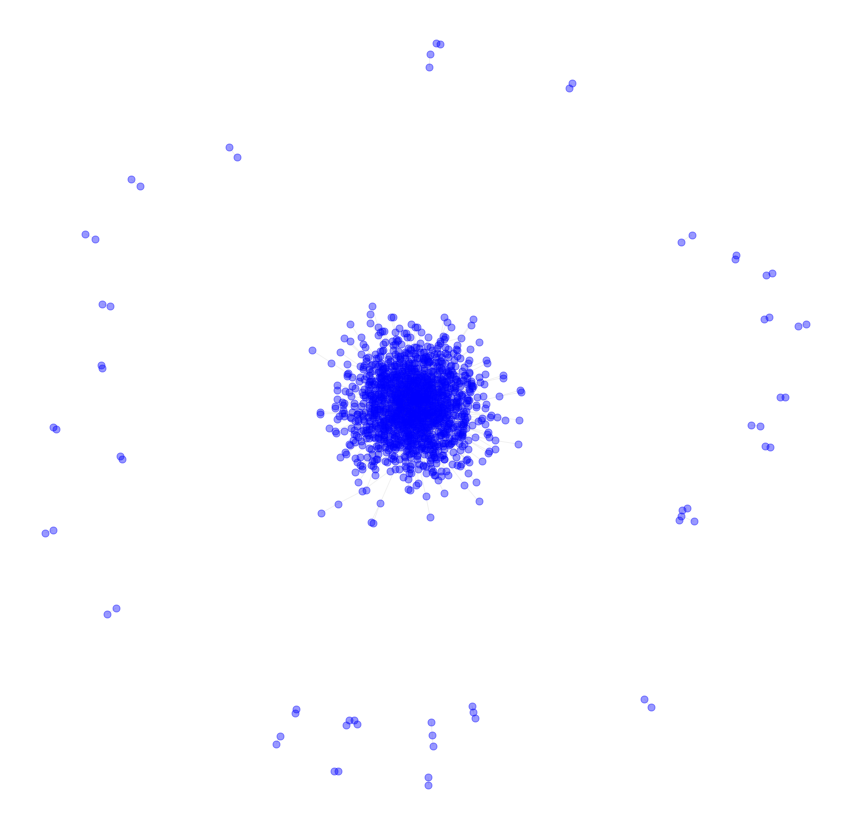

In [211]:
plt.figure(figsize=(15,15))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="black", alpha=0.05)
plt.axis('off')
plt.show()

## Conexidad: 

¿Cuántas componentes conexas tiene la red? Si son más de una, ¿qué fracción de los nodos representan las componentes pequeñas, y qué fracción la componente gigante? [Aquí asumo que todas las redes tienen una componente gigante, lo que me consta.]

In [134]:
nx.is_connected(Gsimp)

True

In [135]:
nx.is_biconnected(Gsimp)

False

In [136]:
nx.number_connected_components(Gsimp)

1

Vemos que si es conectada y la red completa esta totalmente conectada, no existe fraccion de componentes pequeñas, y la componente gigante corresponde al 100% de la red

In [137]:
giant = max(nx.connected_components(Gsimp), key=len)
#en este caso la componente gigante es la misma red, por lo que seguiremos usando el grafo Gsimp

Para el análisis de aquí en adelante, trabajen sólo con la componente gigante. Es posible hacer la extracción en el propio Gephi, o bien la pueden hacer en NetworkX.

## Grados: 

Reporte el grado mínimo, máximo y promedio. Grafique la distribución de los grados. [Ojo: no use el gráfico que hace Gephi; exporte la lista de grados y haga un gráfico en otra herramienta -Excel, R, cualquiera sirve. Para exportar vaya a la tabla de datos en el "Laboratorio de datos", y ahí puede exportar.] Intente describir la distribución de los grados (es probable que se acerque a una ley de potencia, pero también podría haber distribuciones distintas en algunas redes).

<AxesSubplot:ylabel='Count'>

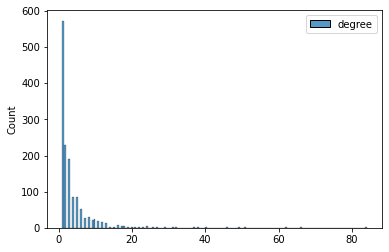

In [138]:
degrees = [(node,val) for (node, val) in Gsimp.degree()]
degrees_df = pd.DataFrame.from_records(degrees, columns=['nodo','degree'])
sns.histplot(degrees_df)


In [160]:
min_degree = min(degrees_df['degree'])
max_degree = max(degrees_df['degree'])
avg_degree = sum(degrees_df['degree'])/len(degrees_df['degree'])

print('Grado mínimo: {}'.format(min_degree))
print('Grado máximo: {}'.format(max_degree))
print('Grado Avg: {}'.format(avg_degree))

Grado mínimo: 1
Grado máximo: 84
Grado Avg: 3.856135401974612


## Distancias: 

Determine la distancia promedio entre los nodos, y el diámetro de la red. ¿Se justifica hablar de efecto small world?

In [142]:
print(nx.info(Gsimp))

Name: 
Type: Graph
Number of nodes: 1418
Number of edges: 2734
Average degree:   3.8561


In [165]:
diameter = nx.diameter(Gsimp)
avg_short_path = nx.average_shortest_path_length(Gsimp)
nodos = nx.number_of_nodes(Gsimp)

print('Diametro: {}'.format(diameter))
print('Promedio distancias mas cortas: {}'.format(avg_short_path))

Diametro: 15
Promedio distancias mas cortas: 6.784391227617894


In [167]:
#logaritmo de n> de nodos / logaritmo promedio de grados
KPI = np.log(nodos) / np.log(avg_degree)
print(KPI)

5.376889871467265


Considerando que tenemos 1418 nodos, y que podamos alcanzar desde cualquier nosodo, el siguiente en casi 7 pasos es característica fundamental del efecto small world! Ademas, el KPI  es del mismo orden de magnitud que el promedio de las distancias mas cortas, lo que confirma la conclusión.

## Transitividad: 

Determine el coeficiente de clustering local de la red. ¿Hay transitividad alta?

In [146]:
clustering= nx.average_clustering(Gsimp)
print('Clustering: {}'.format(clustering))

0.4877087537862807

In [147]:
nx.transitivity(Gsimp)

0.2507913395796404

Ninguno de estos indicadores supera 0,5, por lo que podemos decir que no existe alta transitividad. 

## Centralidades: 

Determine la centralidad de intermediación, PageRank y cercanía de cada nodo. Expórtelas a alguna herramienta de análisis y explore qué tan relacionadas están entre sí, y con el grado del nodo (en particular, haga gráficos de dispersión de grado y PageRank, PageRank e intermediación, etc.). Identifique las mayores desviaciones (nodos con centralidad alta según una métrica y baja según otra) e intente explicarlas en función de la estructura de la red. Obtenga imágenes de la red coloreada según los valores de las distintas centralidades. [Nota: Gephi es un poco críptico. Para calcular intermediación o cercanía hay que decirle que calcule "diámetro de la red", que no tiene nada que ver.]

In [148]:
page_rank_dict = nx.pagerank(Gsimp)
closeness_dict = nx.closeness_centrality(Gsimp)
betweenness_dict = nx.betweenness_centrality(Gsimp)


In [149]:
page_rank_df = pd.DataFrame.from_dict(page_rank_dict,orient = 'index')
closeness_df = pd.DataFrame.from_dict(closeness_dict,orient = 'index')
betweenness_df = pd.DataFrame.from_dict(betweenness_dict,orient = 'index')

In [150]:
page_rank_df.reset_index( inplace=True)
page_rank_df.columns = ['nodo', 'page_rank']

closeness_df.reset_index(inplace=True)
closeness_df.columns = ['nodo', 'closeness']

betweenness_df.reset_index(inplace=True)
betweenness_df.columns = ['nodo', 'betweenness']

In [151]:
degrees = [(node,val) for (node, val) in Gsimp.degree()]
degrees_df = pd.DataFrame.from_records(degrees, columns=['nodo','degree'])

In [152]:
centralidades_df = pd.merge(page_rank_df, closeness_df, on=['nodo'], how='left')
centralidades_df = pd.merge(centralidades_df, betweenness_df, on=['nodo'], how='left')
centralidades_df = pd.merge(centralidades_df, degrees_df, on=['nodo'], how='left')
centralidades_df.head()

,nodo,page_rank,closeness,betweenness,degree
0,Deafness,0.012563,0.197079,0.190302,66
1,ACTG1,0.000267,0.164653,0.000000,1
2,JAG1,0.000589,0.165152,0.000000,3
3,ATP2B2,0.000267,0.164653,0.000000,1
4,COL11A2,0.000684,0.165306,0.000000,4


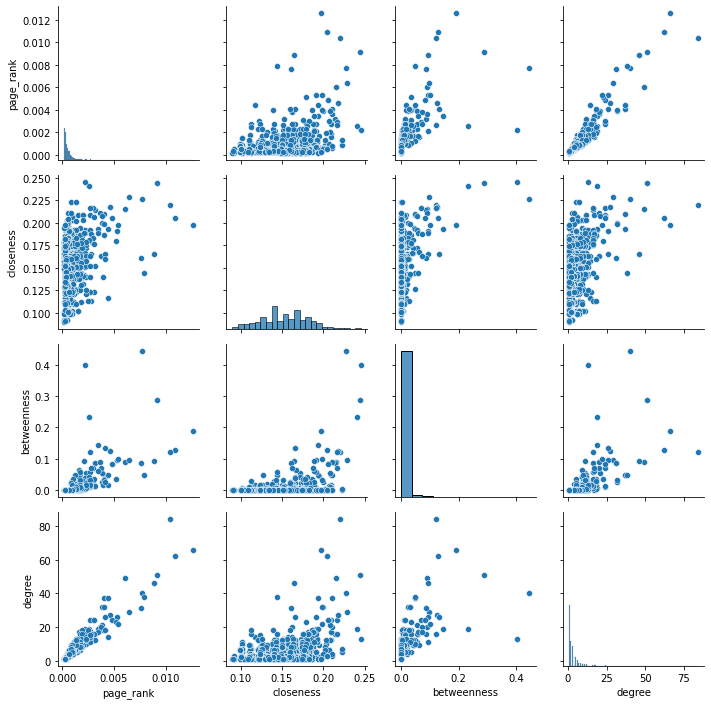

In [153]:
g = sns.PairGrid(centralidades_df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [182]:
#ordenando por page_rank
list_pagerank = centralidades_df.sort_values(by=['page_rank'], ascending=False)['nodo'].head(10).tolist()
#ordenando por closeness
list_closeness = centralidades_df.sort_values(by=['closeness'], ascending=False)['nodo'].head(10).tolist()
#ordenando por betweenness
list_bet = centralidades_df.sort_values(by=['betweenness'], ascending=False)['nodo'].head(10)

In [183]:
list(set(list_pagerank).intersection(set(list_closeness)).intersection(set(list_bet)) )

['Cardiomyopathy', 'Diabetes mellitus']

Los 'Diabetes mellitus' y 'Cardiomyopathy', es considerado central bajo las 3 medidas de centralidad.

## Núcleo/Periferia: 

Determine la profundidad de k-cores (el máximo k para el cual el k-core es no vacío), y la cantidad de nodos en cada k-shell (cada “capa de la cebolla” en k-cores).

In [154]:
Gsimp.remove_edges_from(nx.selfloop_edges(Gsimp))

i=1
len_k_cores_list = []
shell_nodes_list = []
while i >= 1:
    len_k_cores = len(nx.k_core(Gsimp,i))
    shell_nodes = len(nx.nodes(nx.k_shell(Gsimp, i)))
    if shell_nodes == 0 or len_k_cores==0:
        break
    else:
        len_k_cores_list.append(len_k_cores)
        shell_nodes_list.append(shell_nodes)
    print(' k: {0}, profundidad: {1}, nodos en shell {2}'.format(i,len_k_cores, shell_nodes))
    i=i+1
    


 k: 1, profundidad: 1418, nodos en shell 573
 k: 2, profundidad: 845, nodos en shell 267
 k: 3, profundidad: 578, nodos en shell 226
 k: 4, profundidad: 352, nodos en shell 90
 k: 5, profundidad: 262, nodos en shell 124
 k: 6, profundidad: 138, nodos en shell 58
 k: 7, profundidad: 80, nodos en shell 14
 k: 8, profundidad: 66, nodos en shell 24
 k: 9, profundidad: 42, nodos en shell 19
 k: 10, profundidad: 23, nodos en shell 11
 k: 11, profundidad: 12, nodos en shell 12


## Comunidades: 

Aplique el algoritmo de Lovaina de detección de comunidades (Gephi lo trae por defecto). Si usa parámetros distintos al default, especifique. Reporte la cantidad y el tamaño de las comunidades encontradas, y el valor de modularidad conseguido. Use las comunidades obtenidas para colorear la red. ¿Se aprecia en el gráfico la estructura de comunidades? ¿Interactúan todas con todas, o cada comunidad se relaciona con unas pocas de las demás? [Aquí si hace falta puede jugar un poco más con las opciones de layout, para buscar un buen dibujo de la red.]

In [193]:
#first compute the best partition
partition = community_louvain.best_partition(Gsimp)
#transformamos a datafrae para luego agrupar
partition_df = pd.DataFrame.from_dict(partition,orient='index')
partition_df.reset_index( inplace=True)
partition_df.columns = ['nodo', 'partition']
#partition_df.head()

In [194]:
partition_df.groupby(['partition']).count()

,nodo
partition,
0,74
1,35
2,59
3,18
4,52
5,25
6,80
7,121
8,119


In [192]:
partition_df

,nodo,partition
0,Deafness,0
1,ACTG1,0
2,JAG1,0
3,ATP2B2,0
4,COL11A2,1
...,...,...
1413,Total iodide organication defect,26
1414,TGFBR1,9
1415,THRB,26
1416,CASP12P1,6


In [204]:
#obtenemos lista de prticiones para luego obtener cuales nodos existen en esas particiones
#con esa informacion, calculamos la modularidad de estas particiones
id_partition_list = partition_df.partition.unique()
partition_sets = []
for part in id_partition_list:
    partition_df_temp = partition_df[partition_df['partition'] == part ]
    nodes_list = set(partition_df_temp.nodo.unique().tolist())
    partition_sets.append(nodes_list)
    
#calculamos modularidad
modularidad = nx_comm.modularity(Gsimp,partition_sets)
print('Modularidad: {}'.format(modularidad))

Modularidad: 0.8769401612389077


In [197]:
community_louvain.modularity(partition, Gsimp)

0.8769401612389077

[29, 0, 39, 161, 63, 22, 14, 108, 159, 75, 12, 75, 124, 36, 137, 141, 174, 19, 60, 64, 121, 16, 31, 23, 74, 115, 14, 0, 175]


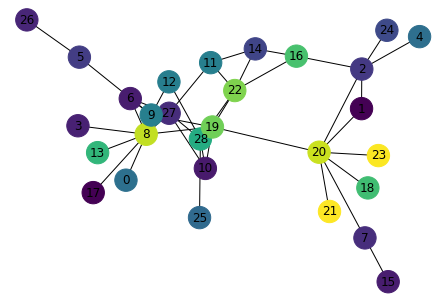

In [157]:
#ploteamos la red como un resumen de conexion entre sus particiones
ind = community_louvain.induced_graph(partition, Gsimp)
color = list(np.random.choice(random.randint(1,255), size=len(ind.nodes())))
print(color)
options = {
    'node_color': color,
    'node_size': 500,
    'width': 1,
    'with_labels':True
}

nx.draw(ind, **options)

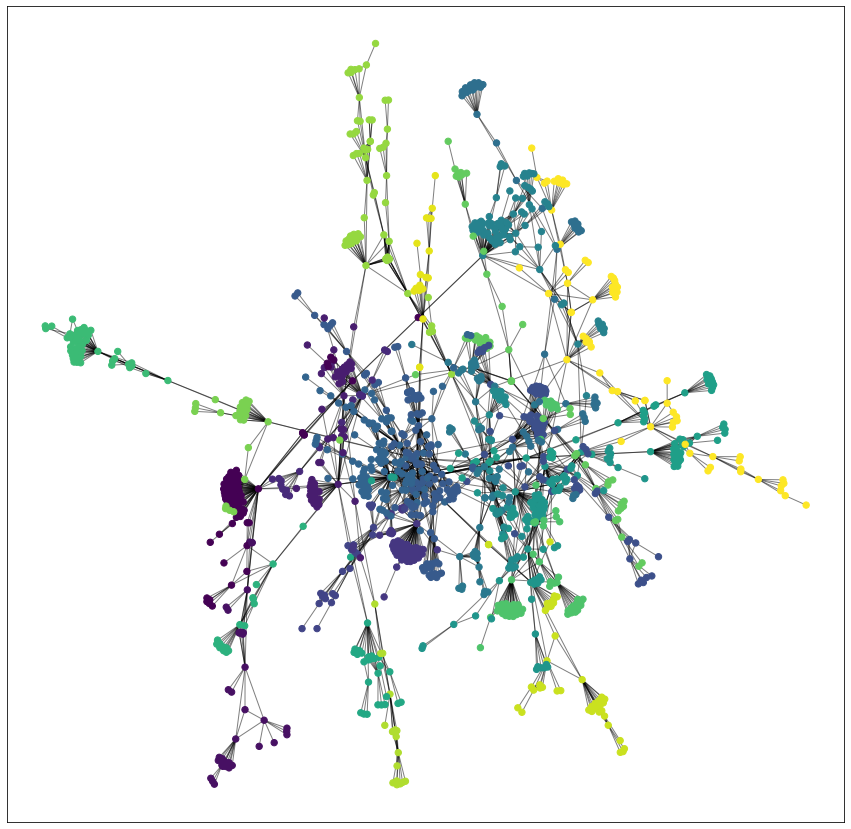

In [202]:
pos = nx.spring_layout(Gsimp)
plt.figure(figsize=(15,15))
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(Gsimp, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(Gsimp, pos, alpha=0.5)
plt.show()

## Asortatividad: 

Calcule el coeficiente de correlación de Newman para medir la asortatividad de la red. ¿Le parece asortativa, disasortativa, o ninguna?

In [158]:
newman = nx.degree_assortativity_coefficient(Gsimp)
pearson = nx.degree_pearson_correlation_coefficient(Gsimp)
print('Newman :{0}, Pearson:{1}'.format(newman,pearson))

Newman :-0.1616546992744353, Pearson:-0.16165469927443546


Respuesta: Dados los valores de los coeficientes la red completa es levemente disasortativa. Esto significa que las conexiones que tiene un nodo difieren bastante de todo el resto. Considerandoq ue este grafo es de enfermedades, podriamos pensar en un arbol de enfermedades donde e nodo pertenece a una rama y seguramente sea muy asortativo con respecto a esa rama, pero nada asortativo con respecto a todos los demas nodos de la red.

## Modelo estructural: 

Genere 10 redes aleatorizadas que compartan la distribución de grados de su red, y para cada una de ellas determine la modularidad (aplicando el mismo algoritmo de Lovaina), el coeficiente de correlación, el coeficiente de clustering local, y la profundidad de k-cores. Compare los valores con el obtenido para su red: ¿pueden explicarse sus valores a partir de la distribución de grados, o parecen ser propiedades específicas de la red?

In [159]:
resultados_iteracion = []
resultados_modularity = []
resultados_correlation = []
resultados_clustering = []
resultados_prof = []

for i in range(10):
    G = nx.configuration_model([d for v, d in Gsimp.degree()])
    G1= nx.Graph()
    for u,v,data in G.edges(data=True):
        if not G1.has_edge(u,v):
            G1.add_edge(u, v)
    
    #first compute the best partition
    partition = community_louvain.best_partition(G1)
    #transformamos a datafrae para luego agrupar
    partition_df = pd.DataFrame.from_dict(partition,orient='index')
    partition_df.reset_index( inplace=True)
    partition_df.columns = ['nodo', 'partition']
    
    id_partition_list = partition_df.partition.unique()
    partition_sets = []
    for part in id_partition_list:
        partition_df_temp = partition_df[partition_df['partition'] == part ]
        nodes_list = set(partition_df_temp.nodo.unique().tolist())
        partition_sets.append(nodes_list)

    
    #calculamos profundidad k-cores
    G1.remove_edges_from(nx.selfloop_edges(G1))
    iteration=1
    iter_list = []
    while iteration >= 1:
        len_k_cores = len(nx.k_core(Gsimp,iteration))
        if len_k_cores==0:
            break
        else:
            iter_list.append(iteration)
        iteration=iteration+1
        
    #calculamos 
    iteracion = i+1
    modularity = nx_comm.modularity(G1,partition_sets)
    corr = nx.degree_assortativity_coefficient(G1)
    clustering = nx.average_clustering(G1)
    profundidad = max(iter_list)
    
    
    #guardamos en listas
    resultados_iteracion.append(iteracion)
    resultados_modularity.append(modularity)
    resultados_correlation.append(corr)
    resultados_clustering.append(clustering)
    resultados_prof.append(profundidad)
    
    
resultados_dict = {
    'iteracion':resultados_iteracion,
    'modularidad':resultados_modularity,
    'correlacion':resultados_correlation,
    'clustering':resultados_clustering,
    'profundidad':resultados_prof
}

resultados_df = pd.DataFrame.from_dict(resultados_dict)
resultados_df

,iteracion,modularidad,correlacion,clustering,profundidad
0,1,0.535424,-0.010117,0.008521,11
1,2,0.531775,-0.014345,0.014219,11
2,3,0.540879,-0.026398,0.016724,11
3,4,0.539088,-0.053922,0.015074,11
4,5,0.538043,-0.030544,0.012436,11
5,6,0.534387,-0.030613,0.014018,11
6,7,0.536447,-0.027522,0.012525,11
7,8,0.535648,-0.025131,0.013933,11
8,9,0.535366,-0.028185,0.012434,11
9,10,0.534031,-0.043369,0.013959,11


In [206]:
print('ORIGINAL | {0} | {1} | {2} | 12'.format(modularidad,pearson, clustering))

ORIGINAL | 0.8769401612389077 | -0.16165469927443546 | 0.013958961234180714 | 12


Solo el coeficiente de clustering es similar, por lo que concluímos que son características especiales de la red.